In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from solver import Solver

In [2]:
def node_label(node) -> str:
    if node.bound.upper - node.bound.lower <= 1e-9:
        return f"{node.var.name} = {node.bound.upper}\nI={node.iteration} D={node.depth}"
    else:
        return f"{node.bound.lower}≤{node.var.name}≤{node.bound.upper}\nI={node.iteration} D={node.depth}"

def node_color(idx, node, origins):
    #print(node.var, node.iteration, node.bound)
    if idx in origins:
        return "green"
    elif node.bound.upper - node.bound.lower <= 1e-9:
        return "blue"
    elif node.var.is_general:
        return "yellow"
    return "magenta"

In [ ]:
sl = Solver("problems/p0201.mps", True)
graphes = sl.start()
print(sl.result())

In [ ]:
nodes, edges, origins = graphes[1037].to_plot_info()

G = nx.DiGraph()

for edge in edges:
    G.add_edge(node_label(nodes[edge[0]]), node_label(nodes[edge[1]]))

pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

plt.figure(3,figsize=(20,6)) 
nx.draw(G,
        pos,
        with_labels=True, 
        font_size=8, 
        node_size=2600, 
        node_color=[node_color(idx, node, origins) for idx, node in nodes.items()]
       )

In [3]:
sl = Solver("problems/supportcase16.mps", True)
graphes = sl.start()
print(sl.result())

number of branching: 1	primal value: None	dual value: 271.9999999999999	number of infisible nodes: 0
number of branching: 2	primal value: None	dual value: 272.0	number of infisible nodes: 0
number of branching: 3	primal value: 306.0	dual value: 272.0	number of infisible nodes: 0
number of branching: 4	primal value: 306.0	dual value: 272.0	number of infisible nodes: 0
number of branching: 5	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 6	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 7	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 8	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 9	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 10	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 11	primal value: 306.0	dual value: 272.0	number of infisible nodes: 

In [37]:
def get_pos(nodes):
    graph = {}
    for node in nodes.values():
        if (node.depth, node.iteration) not in graph:
            graph[(node.depth, node.iteration)] = [node]
        else:
            graph[(node.depth, node.iteration)].append(node)

    gr = sorted(graph.items())

    current_x = 0
    current_y = 0
    x_step, y_step = 1, -1
    current_depth = 0
    res = {}
    for (depth, it), gr_nodes in gr:
        if depth == 0 and it == 0:
            current_y = -1
        if depth != current_depth:
            current_y = 0
        for node in gr_nodes:
            res[node_label(node)] = (current_x, current_y)
            current_x += x_step
        current_y += y_step
        current_depth = depth

    return res

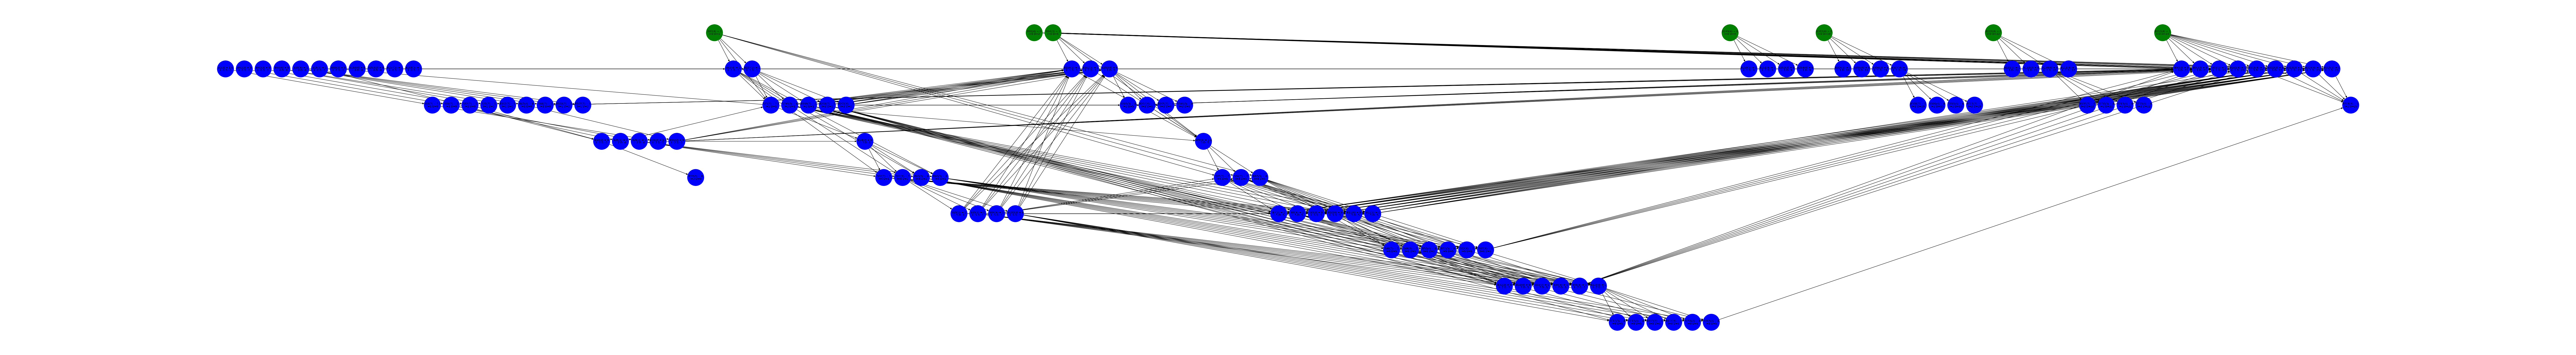

In [38]:
nodes, edges, origins = graphes[120].to_plot_info()

G = nx.DiGraph()

for edge in edges:
    G.add_edge(node_label(nodes[edge[0]]), node_label(nodes[edge[1]]))

#pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
# pos = dict([(node_label(n), (n.depth, -n.iteration)) for n in nodes.values()])
# print(pos)
pos = get_pos(nodes)

plt.figure(3,figsize=(110,15)) 
nx.draw(G,
        pos,
        with_labels=True, 
        font_size=8, 
        node_size=2600, 
        node_color=[node_color(idx, node, origins) for idx, node in nodes.items()]
       )